# HW 2 - SVD for Facial Images
### EE 399 Machine Learning for Science and Engineering

Completed by: Ewan Lister on 04/16/2023


[Yale Faces Download](https://drive.google.com/file/d/1pqs5WAO7FKVL9GBZkvws6cB3ztLxwdQS/view?usp=sharing)

This file has a total of 39 different faces with about 65 lighting scenes for each face (2414 faces in all). The individual images are columns of the matrix X, where each image has been downsampled to 32×32 pixels and converted into gray scale with values between 0 and 1. So the matrix is size 1024 × 2414. To important the file, use the following

      import numpy as np
      from scipy.io import loadmat
      results=loadmat(’yalefaces.mat’)
      X=results[’X’]


In [4]:
# import numpy, scipy, and yale faces data
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
results=loadmat('yalefaces.mat')
X=results['X']

### (a) 

Compute a 100 × 100 correlation matrix $C$ where you will compute the dot product (correlation) between the first 100 images in the matrix $X$. Thus each element is given by $c_{jk} = x_{j}^{T}x_{k}$ where $x_{j}$ is the $j$th column of the matrix. Plot the correlation matrix using pcolor.

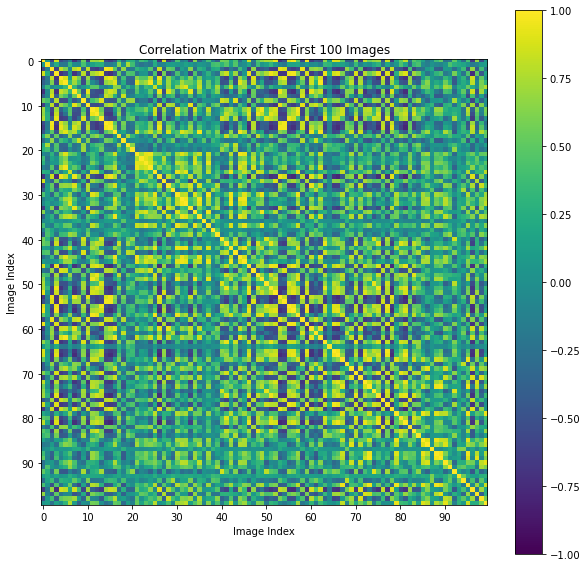

In [9]:
# Select the first 100 images
first_100_images = X[:, :100]

# Calculate the correlation matrix
correlation_matrix = np.corrcoef(first_100_images.T)

# Plot the correlation matrix
plt.figure(figsize=(10, 10))
plt.imshow(correlation_matrix, cmap='viridis', vmin=-1, vmax=1)
plt.colorbar()

# Set the title and axes labels
plt.title('Correlation Matrix of the First 100 Images')
plt.xlabel('Image Index')
plt.ylabel('Image Index')

# Adjust the axes range and ticks
plt.xlim(-0.5, 99.5)
plt.ylim(99.5, -0.5)
plt.xticks(np.arange(0, 100, 10))
plt.yticks(np.arange(0, 100, 10))

# Show the plot
plt.show()


### (b)

From the correlation matrix for part (a), which two images are most highly correlated? Which are most uncorrelated? Plot these faces.


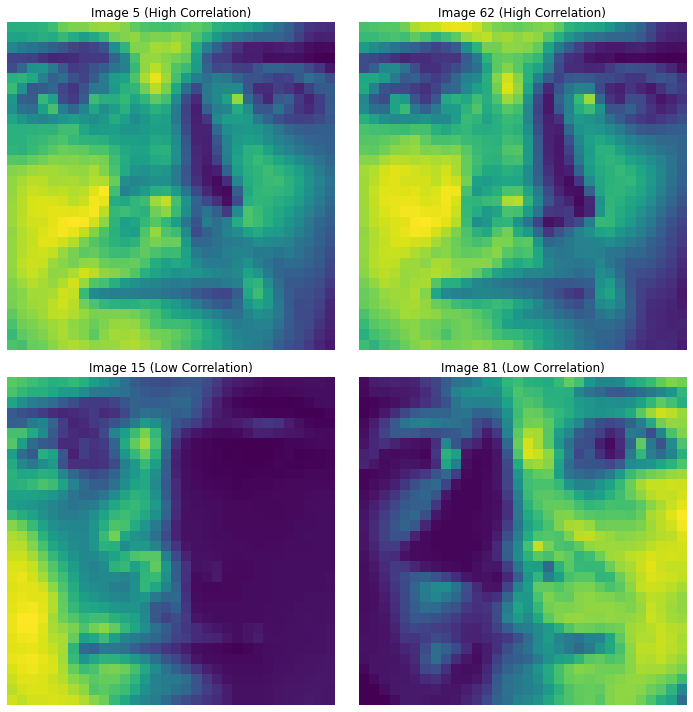

In [12]:

# Calculate the correlation matrix
correlation_matrix = np.corrcoef(first_100_images.T)

# Mask the diagonal elements of the correlation matrix
masked_corr_matrix = np.ma.array(correlation_matrix, mask=np.eye(correlation_matrix.shape[0], dtype=bool))

# Find the indices of the highest and lowest correlation
max_corr_indices = np.unravel_index(np.ma.argmax(masked_corr_matrix), masked_corr_matrix.shape)
min_corr_indices = np.unravel_index(np.ma.argmin(masked_corr_matrix), masked_corr_matrix.shape)

# Extract the corresponding images
highest_corr_images = first_100_images[:, max_corr_indices]
lowest_corr_images = first_100_images[:, min_corr_indices]

# Plot the correlated and uncorrelated pairs
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

# Plot the images with highest correlation
axs[0, 0].imshow(highest_corr_images[:, 0].reshape(32, 32), cmap='viridis')
axs[0, 0].set_title('Image {} (High Correlation)'.format(max_corr_indices[0]))
axs[0, 0].axis('off')

axs[0, 1].imshow(highest_corr_images[:, 1].reshape(32, 32), cmap='viridis')
axs[0, 1].set_title('Image {} (High Correlation)'.format(max_corr_indices[1]))
axs[0, 1].axis('off')

# Plot the images with lowest correlation
axs[1, 0].imshow(lowest_corr_images[:, 0].reshape(32, 32), cmap='viridis')
axs[1, 0].set_title('Image {} (Low Correlation)'.format(min_corr_indices[0]))
axs[1, 0].axis('off')

axs[1, 1].imshow(lowest_corr_images[:, 1].reshape(32, 32), cmap='viridis')
axs[1, 1].set_title('Image {} (Low Correlation)'.format(min_corr_indices[1]))
axs[1, 1].axis('off')

# Show the plots
plt.tight_layout()
plt.show()

### (c)

Repeat part (a) but now compute the 10 × 10 correlation matrix between images and plot the correlation matrix between them. 

        [1, 313, 512, 5, 2400, 113, 1024, 87, 314, 2005].
        
(Just for clarification, the first image is labeled as one, not zero like python might do)


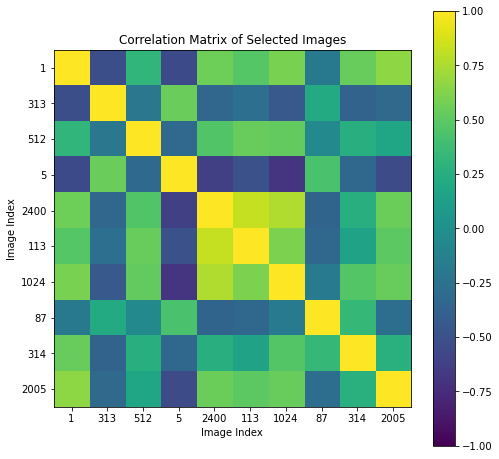

In [14]:
# Select the specified images (accounting for one-based indexing)
image_indices = [1, 313, 512, 5, 2400, 113, 1024, 87, 314, 2005]
selected_images = X[:, [i - 1 for i in image_indices]]

# Calculate the correlation matrix
correlation_matrix = np.corrcoef(selected_images.T)

# Plot the correlation matrix
plt.figure(figsize=(8, 8))
plt.imshow(correlation_matrix, cmap='viridis', vmin=-1, vmax=1)
plt.colorbar()

# Set the title and axes labels
plt.title('Correlation Matrix of Selected Images')
plt.xlabel('Image Index')
plt.ylabel('Image Index')

# Adjust the axes range and ticks
plt.xticks(np.arange(0, 10), image_indices)
plt.yticks(np.arange(0, 10), image_indices)

# Show the plot
plt.show()


### (d) 

Create the matrix $Y = XX^{T}$ and find the first six eigenvectors with the largest magnitude eigenvalue.

[[-0.02384327  0.04535378 -0.05653196  0.04441826 -0.03378603  0.02207542]
 [-0.02576146  0.04567536 -0.04709124  0.05057969 -0.01791442  0.03378819]
 [-0.02728448  0.04474528 -0.0362807   0.05522219 -0.00462854  0.04487476]
 ...
 [-0.02082937 -0.03737158 -0.06455006 -0.01006919  0.06172201  0.03025485]
 [-0.0193902  -0.03557383 -0.06196898 -0.00355905  0.05796353  0.02850199]
 [-0.0166019  -0.02965746 -0.05241684  0.00040934  0.05757412  0.00941028]]


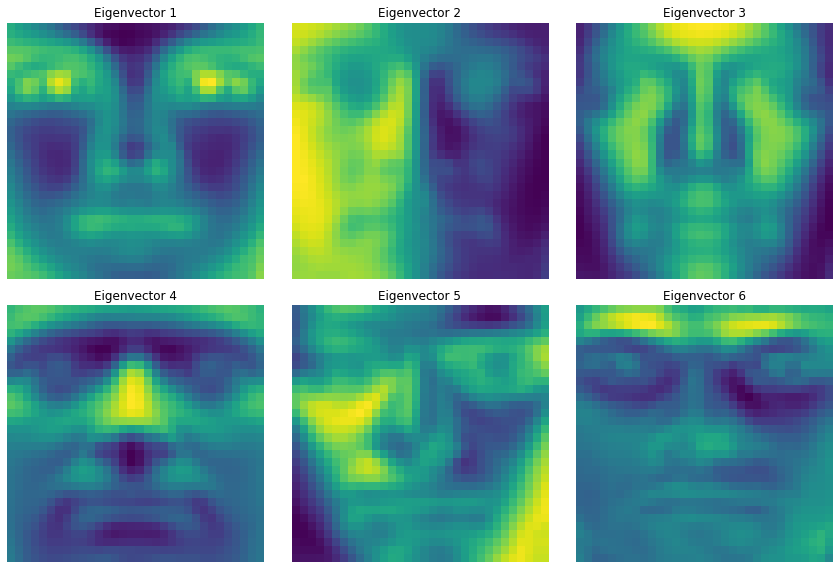

In [25]:
# create symmetric matrix Y
Y = np.dot(X,np.transpose(X))

# Compute the eigenvalues and eigenvectors of Y
eigenvalues, eigenvectors = np.linalg.eigh(Y)

# Sort the eigenvalues and eigenvectors by descending eigenvalue magnitudes
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# Select the first 6 eigenvectors corresponding to the largest eigenvalues
first_6_eigenvectors = sorted_eigenvectors[:, :6]

print(first_6_eigenvectors)

# Plot the first six eigenvectors as images
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

for i in range(6):
    row = i // 3
    col = i % 3
    axs[row, col].imshow(first_6_eigenvectors[:, i].reshape(32, 32), cmap='viridis')
    axs[row, col].set_title('Eigenvector {}'.format(i+1))
    axs[row, col].axis('off')

plt.tight_layout()
plt.show()

### (e) 

SVD the matrix X and find the first six principal component directions.

In [26]:

# Perform SVD on the matrix X
U, S, Vt = np.linalg.svd(X, full_matrices=False)

# Select the first six principal component directions
first_6_principal_components = Vt[:6, :]

print(first_6_principal_components)


[[-0.01219331 -0.00215188 -0.01056679 ... -0.02177117 -0.03015309
  -0.0257889 ]
 [-0.01938848 -0.00195186  0.02471869 ...  0.04027773  0.00219562
   0.01553129]
 [ 0.01691206  0.00143586  0.0384465  ...  0.01340245 -0.01883373
   0.00643709]
 [ 0.0204079  -0.01201431  0.00397553 ... -0.01641295 -0.04011563
   0.02679029]
 [-0.01902342  0.00418948  0.0384026  ... -0.01092512  0.00087341
   0.01260435]
 [-0.0090084  -0.00624237  0.01580824 ... -0.00977639  0.00090316
   0.00304479]]


### (f) 

Compare the first eigenvector $v_{1}$ from (d) with the first SVD mode $u_{1}$ from (e) and compute the norm of difference of their absolute values.


Norm difference of the absolute values: 5.688808695715053e-16


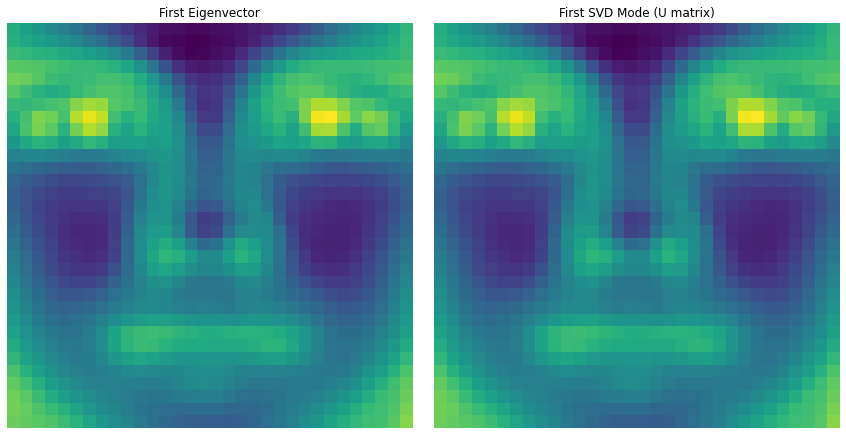

In [29]:
# Compute the absolute values of the first eigenvector and the first SVD mode (U matrix)
abs_first_eigenvector = np.abs(sorted_eigenvectors[:, 0])
abs_first_svd_mode = np.abs(U[:, 0])

# Compute the norm difference of the absolute values
norm_difference = np.linalg.norm(abs_first_eigenvector - abs_first_svd_mode)

print("Norm difference of the absolute values:", norm_difference)

# Plot the first eigenvector and the first SVD mode (U matrix)
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the first eigenvector
axs[0].imshow(sorted_eigenvectors[:, 0].reshape(32, 32), cmap='viridis')
axs[0].set_title('First Eigenvector')
axs[0].axis('off')

# Plot the first SVD mode from the U matrix
axs[1].imshow(U[:, 0].reshape(32, 32), cmap='viridis')
axs[1].set_title('First SVD Mode (U matrix)')
axs[1].axis('off')

plt.tight_layout()
plt.show()


### (g) 

Compute the percentage of variance captured by each of the first 6 SVD modes. Plot the first 6 SVD modes.

Percentage of the variance captured by the first 6 modes of U: 93.88533720519487


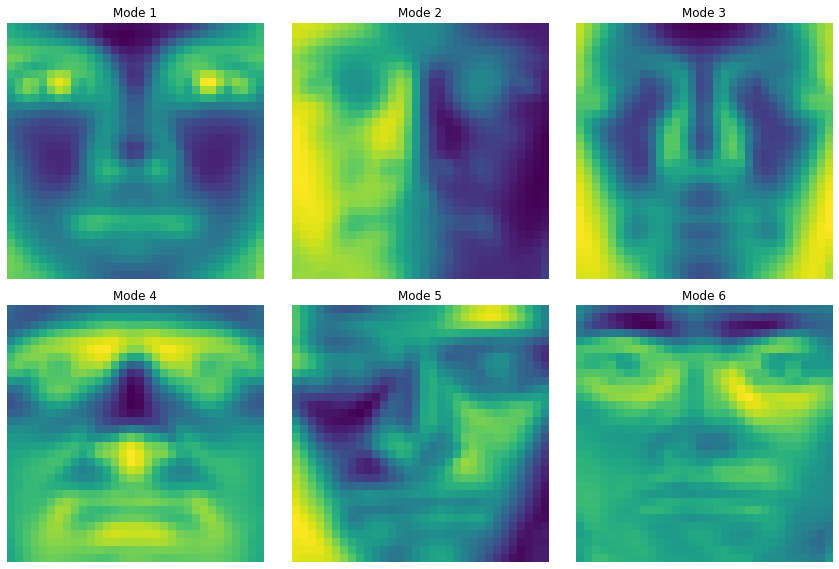

In [34]:
# Compute the variance captured by the first 6 modes
variance_captured = np.sum(S[:6] ** 2) / np.sum(S ** 2)

# Convert the variance captured to percentage
percentage_variance_captured = variance_captured * 100

print("Percentage of the variance captured by the first 6 modes of U:", percentage_variance_captured)

# Plot the first six modes as images
fig, axs = plt.subplots(2, 3, figsize=(12, 8))

for i in range(6):
    row = i // 3
    col = i % 3
    axs[row, col].imshow(U[:, i].reshape(32, 32), cmap='viridis')
    axs[row, col].set_title('Mode {}'.format(i+1))
    axs[row, col].axis('off')

plt.tight_layout()
plt.show()